In [7]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# load the dataset
data = pd.read_csv('Emotion_classify_Data.csv')

# check the dimension of the dataset
print(data.shape)

# return the first 5 rows of the dataset
data.head()

(5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


#### Attributes Description:

1. Comment - a diverse collection of text samples
2. Emotion - corresponding emotion the text conveys ['anger', 'joy', 'fear']

In [11]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [12]:
# define a function to process the textual data in `subject` column
# steps (remove punctuation, tokenization, remove stopwords, stemming, lemmatization)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
import string

punctuation = re.compile("[" + re.escape(string.punctuation) + "]")

# define the list of stopwords
stopwords = stopwords.words('english')
stopwords = stopwords + ['feel', 'feeling', 'really', 'time', 'im', 'know', 'make', 'little']

lemmatizer = WordNetLemmatizer()

def textProcess(text):
    res = []
    text_punc_remove = re.sub(punctuation,'',text)
    tokens = word_tokenize(text_punc_remove)
    for token in tokens:
        if token.lower() not in stopwords:
            lemmatized_word = lemmatizer.lemmatize(token)
            res.append(lemmatized_word)
    return ' '.join(res)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# insert a new column which contains the processed text from column 'Comment'
data['processed_text'] = data['Comment'].apply(textProcess)

# return the first 5 rows of the dataset with additional column
data.head()

,Comment,Emotion,processed_text
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death reluctant drop
1,im so full of life i feel appalled,anger,full life appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ive angry r like idiot trusting first place
4,i feel suspicious if there is no one outside l...,fear,suspicious one outside like rapture happened s...


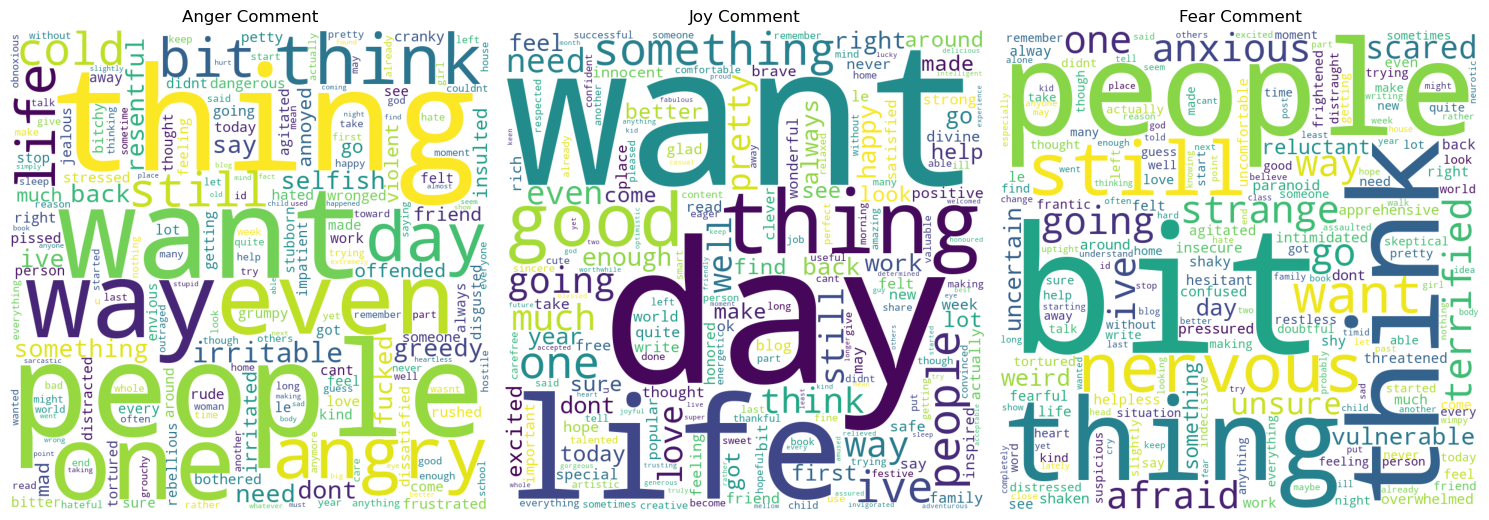

In [14]:
# Question: what is the common words in the anger, fear and joy text?
!pip install wordcloud

from wordcloud import WordCloud

emotion = data.groupby('Emotion')
anger = emotion.get_group('anger')
joy = emotion.get_group('joy')
fear = emotion.get_group('fear')

combined_anger_text = ' '.join(anger['processed_text'])
combined_joy_text = ' '.join(joy['processed_text'])
combined_fear_text = ' '.join(fear['processed_text'])

# create a word cloud using the combined text
wordcloud_anger = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_anger_text)

wordcloud_joy = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_joy_text)

wordcloud_fear = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_fear_text)
 
# plot the WordCloud image
figure, axes = plt.subplots(1,3, figsize=(15,6))
axes[0].imshow(wordcloud_anger)
axes[0].axis('off')
axes[0].set_title('Anger Comment')

axes[1].imshow(wordcloud_joy)
axes[1].axis('off')
axes[1].set_title('Joy Comment')

axes[2].imshow(wordcloud_fear)
axes[2].axis('off')
axes[2].set_title('Fear Comment')

plt.tight_layout()
plt.show()

#### Data Processing

In [8]:
# split the dataset into train and test data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(data['processed_text'], data['Emotion'], test_size=0.2, random_state=122)

# check the dimension of the train and test datasets
print('Xtrain: ', Xtrain.shape)
print('Xtest: ', Xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)

Xtrain:  (4749,)
Xtest:  (1188,)
ytrain:  (4749,)
ytest:  (1188,)


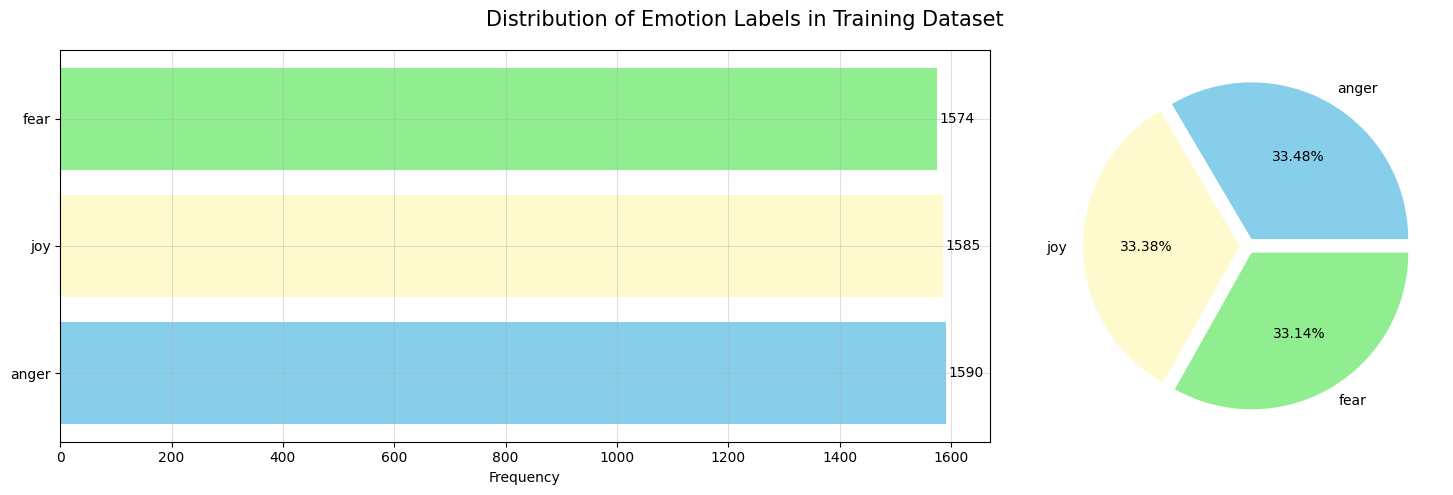

In [9]:
# distribution of the classes of the label/target in training data

target = ytrain.value_counts()

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
axes[0].barh(y=target.index, width=target.values, color=['skyblue','lemonchiffon','lightgreen'])
axes[0].set_xlabel('Frequency')

for index, values in enumerate(target):
    axes[0].text(values+5, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(target.values, labels=target.index, explode=[0.05,0.05,0.05], colors=['skyblue','lemonchiffon','lightgreen'], autopct='%.2f%%')
figure.suptitle('Distribution of Emotion Labels in Training Dataset', fontsize=15)
plt.tight_layout()
plt.show()

In [10]:
# encoding the target/label feature for train and test datasets
from sklearn.preprocessing import LabelEncoder

# initialize the LabelEncoder object
encoder = LabelEncoder()

# encode the training data
ytrain_encoded  = encoder.fit_transform(ytrain)

# encode the test data
ytest_encoded = encoder.transform(ytest)

In [11]:
# check corresponding labels of the encoded numeric label
numLabel = np.unique(ytrain_encoded)
print(numLabel)
labels = encoder.inverse_transform(numLabel)
labels

[0 1 2]


array(['anger', 'fear', 'joy'], dtype=object)

In [12]:
# feature transformation - TF-IDF to the processed text feature
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer  object
vectorizer = TfidfVectorizer()

# vectorize and perform TF*IDF to the training data
Xtrain_vectorized = vectorizer.fit_transform(Xtrain)

# vectorize and perform TF*ID to the test data
Xtest_vectorized = vectorizer.transform(Xtest)

In [13]:
# the word in the `bag` (entire word vector, vocab)
vocab = vectorizer.get_feature_names_out()

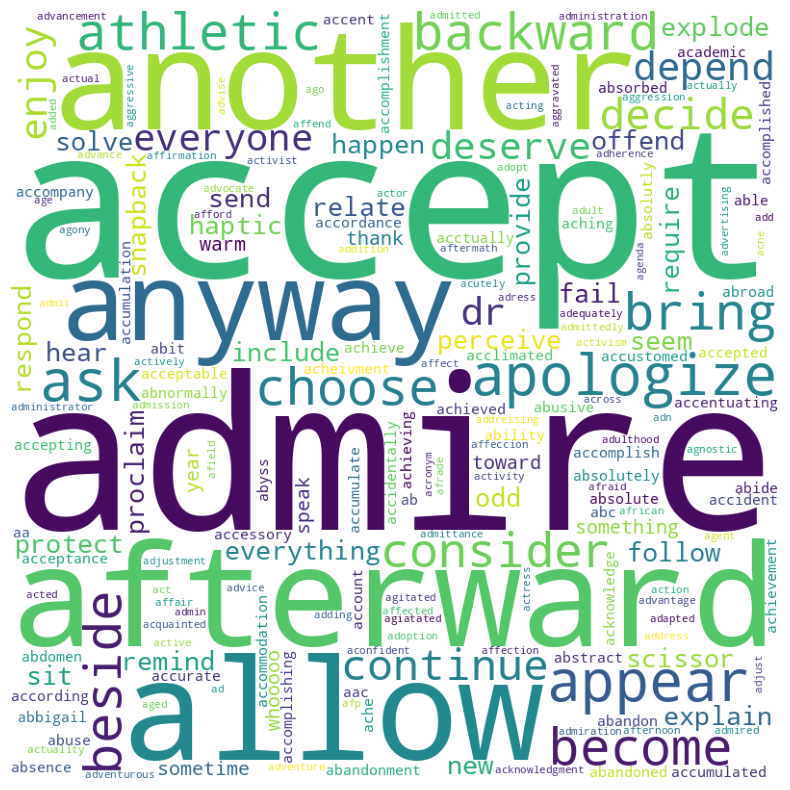

In [14]:
# Question: what is the common words in the vocab?

combined_vocab = ' '.join(vocab)


# create a word cloud using the combined text
wordcloud_vocab = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_vocab)
 
# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_vocab)
plt.axis('off')
plt.show()

#### Trained a Classification Model with MultinomialNB Classifiers

In [15]:
# train a classification model using MultinomialNB
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB()
mNB.fit(Xtrain_vectorized, ytrain_encoded)

MultinomialNB()

In [16]:
# evaluate the model performance on test dataset
ypred = mNB.predict(Xtest_vectorized)

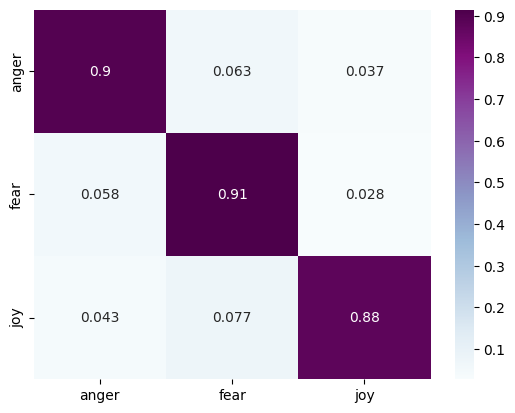

In [17]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(ytest_encoded, ypred, normalize='true')

# visualize the confusion matrix in a heatmap
plt.figure()
sns.heatmap(cm_test, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [18]:
# classification report (precision, recall, F1, and accuracy score)
from sklearn.metrics import classification_report

test_report = classification_report(ytest_encoded, ypred, target_names=labels)
print(test_report)

              precision    recall  f1-score   support

       anger       0.90      0.90      0.90       410
        fear       0.85      0.91      0.88       363
         joy       0.94      0.88      0.91       415

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188

